In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\siram\OneDrive\Desktop\data uefa'

In [4]:
df = pd.read_csv(os.path.join(path,'key_stats.csv'), index_col = False)

C:\Users\siram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='goals', ylabel='Density'>

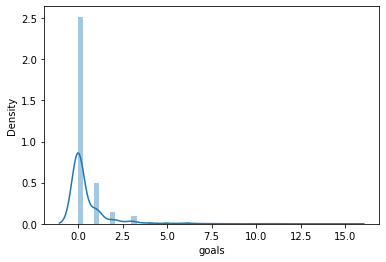

In [5]:
sns.distplot(df['goals'], bins=50) # Shows extreme values



C:\Users\siram\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='minutes_played', ylabel='Density'>

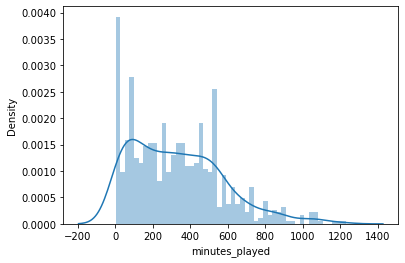

In [7]:
sns.distplot(df['minutes_played'], bins=50) # Shows extreme values

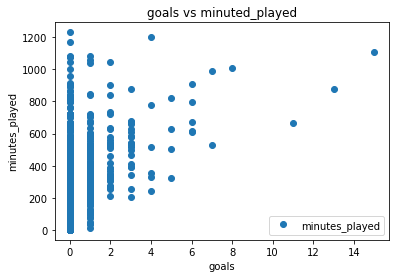

In [9]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# 1. goals vs minuted_played
df.plot(x = 'goals', y='minutes_played',style='o')
plt.title('goals vs minuted_played')  
plt.xlabel('goals')  
plt.ylabel('minutes_played')  
plt.show()

In [ ]:
## Hypothesis: the higher the match played the higher goals

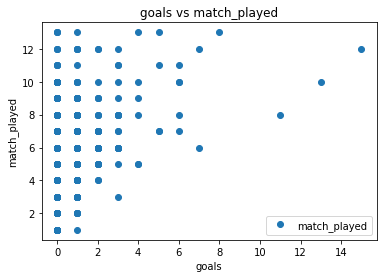

In [10]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# 1. goals vs match_played
df.plot(x = 'goals', y='match_played',style='o')
plt.title('goals vs match_played')  
plt.xlabel('goals')  
plt.ylabel('match_played')  
plt.show()

In [17]:
# Reshape the variables into NumPy arrays and put them into separate objects.

x = df['minutes_played'].values.reshape(-1,1)
y = df['goals'].values.reshape(-1,1)

In [18]:
x

array([[1230],
       [1199],
       [1106],
       [1077],
       [1076],
       [1040],
       [ 959],
       [ 914],
       [ 902],
       [ 867],
       [ 804],
       [ 574],
       [ 505],
       [ 349],
       [ 296],
       [ 207],
       [ 113],
       [  93],
       [  84],
       [  66],
       [  37],
       [  12],
       [   8],
       [   7],
       [   6],
       [1170],
       [1008],
       [ 849],
       [ 826],
       [ 822],
       [ 810],
       [ 794],
       [ 720],
       [ 666],
       [ 630],
       [ 604],
       [ 578],
       [ 487],
       [ 385],
       [ 344],
       [ 323],
       [ 300],
       [ 245],
       [ 215],
       [ 211],
       [ 187],
       [ 185],
       [ 180],
       [ 180],
       [  91],
       [  59],
       [   1],
       [   1],
       [1080],
       [1080],
       [1055],
       [1046],
       [1045],
       [1003],
       [ 986],
       [ 906],
       [ 900],
       [ 900],
       [ 900],
       [ 891],
       [ 878],
       [ 8

In [19]:
y

array([[ 0],
       [ 4],
       [15],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 2],
       [ 0],
       [ 0],
       [ 0],
       [ 5],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 8],
       [ 1],
       [ 0],
       [ 5],
       [ 0],
       [ 0],
       [ 2],
       [ 1],
       [ 0],
       [ 1],
       [ 1],
       [ 1],
       [ 2],
       [ 0],
       [ 5],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 1],
       [ 0],
       [ 1],
       [ 2],
       [ 0],
       [ 0],
       [ 7],
       [ 6],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 3],
       [13],
       [ 0],
       [ 0],
       [ 2],
       [ 1],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 0],
       [ 6],

In [20]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [22]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [23]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

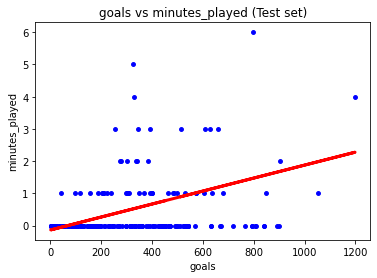

In [24]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('goals vs minutes_played (Test set)')
plot_test.xlabel('goals')
plot_test.ylabel('minutes_played')
plot_test.show()

In [25]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [26]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00201329]]
Mean squared error:  0.8010761302190765
R2 score:  0.01447195401359036


In [ ]:
### The slope shows that goal (X) rises, minutes stays thesame or slightly rises at a degree of 0.002. The mean squared error shows that theres a small average squared difference between estimated and true values thus a regression may be the best model to predict the relationship between the two variables. The R2 score of 0.014 shows that the modelis an very good fit.

In [27]:
y_predicted

array([[ 7.67734485e-01],
       [ 2.04012955e-01],
       [ 4.57687643e-01],
       [ 1.46030665e+00],
       [ 2.28172449e-01],
       [ 1.39990791e+00],
       [ 5.06006632e-01],
       [ 1.49251931e+00],
       [ 3.08704096e-01],
       [ 1.57103766e+00],
       [ 4.69712813e-03],
       [ 5.28152834e-01],
       [ 7.11357370e-02],
       [ 2.04012955e-01],
       [ 5.12046505e-01],
       [-1.20126925e-01],
       [ 7.19415496e-01],
       [ 3.50983211e-01],
       [ 4.95940176e-01],
       [ 1.14019335e+00],
       [ 5.86538279e-01],
       [ 7.67734485e-01],
       [ 5.82511696e-01],
       [ 8.12026891e-01],
       [ 2.08034576e-02],
       [ 4.29496605e-02],
       [ 9.48930691e-01],
       [ 1.98577565e+00],
       [ 4.59700934e-01],
       [ 5.90564861e-01],
       [ 1.67774210e+00],
       [-2.55022395e-02],
       [ 2.52331943e-01],
       [ 1.07374978e-01],
       [-5.77148984e-02],
       [ 8.50279423e-01],
       [-1.04020595e-01],
       [ 1.13414852e-01],
       [ 7.3

In [28]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,0,0.767734
1,0,0.204013
2,0,0.457688
3,0,1.460307
4,0,0.228172
5,0,1.399908
6,0,0.506007
7,0,1.492519
8,1,0.308704
9,1,1.571038


In [29]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [30]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [31]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00201329]]
Mean squared error:  1.8433021718450047
R2 score:  0.124929484991534


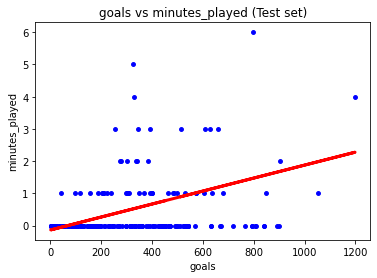

In [32]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('goals vs minutes_played (Test set)')
plot_test.xlabel('goals')
plot_test.ylabel('minutes_played')
plot_test.show()

In [33]:
###the model was successful in showing the relationship between goals and minutes played. the regression method is a perfect fit for this analysis.
###by only having the goals of one edition there may be a certain bias in the results.